### Statistical Data Analysis - Maximizing Revenue for Taxi Drivers analyzing Customer Payment Type

#### Problem Statement

##### In the fast-paced taxi-booking service, generating the most revenue is crucial forf long-term and driver happiness. The goal of this analysis is to use data-driven statistical analysis to maximize the revenue generated for taxi-drivers. The research aims to determine if the payment method impacts fare pricing relating the fare amount and payment type.

##### The data is obtained from Data World for NYC Taxi. Since the data is too large, it can be obtained from the site:
##### https://data.world/vizwiz/nyc-taxi-jan-2020/workspace/file?filename=yellow_tripdata_2020-01.csv

#### Objective

##### The main goal is to run A/B Testing examining the relationship between total fare and payment method. The project applied python hypothesis testing and descriptive statistics to extract the insights from data to generate more income. To sum up, we identify if there is a huge gap between cash payment and card payment.

#### Reasearch Question

##### Is there a relationship between fare amount and payment type? Is it possible to nudge the customers towards the payment methods generating higher revenue without negatively impacting the service and customer experience?

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#### Load dataset

In [2]:
data = pd.read_csv ('yellow_tripdata_2020.csv')
data.head ()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


##### Since the date is too large, I could not load and view all in Excel and by default in Excel, throws data loss error. Thus, loaded in df directly for analysis. Also for this project, I will now only select relevant columns and manipulate accordingly.

#### Exploratory Data Analysis

In [3]:
data.shape

(6405008, 18)

##### Lets determine the factors affecting fare price - distance, duration and rate. The data does not have duration so we calculate duration. We can apply Regression Analysis, Time Series or Statistical calculation. Here, we use calculations.

In [4]:
data.dtypes

VendorID                 float64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

In [5]:
data['tpep_pickup_datetime'] = pd.to_datetime (data['tpep_pickup_datetime'])  # Converting object data type to datetime
data['tpep_dropoff_datetime'] = pd.to_datetime (data['tpep_dropoff_datetime'])

In [6]:
# Now duration is calculated.
data ['duration'] = data ['tpep_dropoff_datetime'] - data ['tpep_pickup_datetime']
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5,0 days 00:04:48
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5,0 days 00:07:25
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5,0 days 00:06:11
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0,0 days 00:04:51
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0,0 days 00:02:18


In [7]:
# The duration came as 0days 00:04:48. Lets convert it to minutes.
#data ['duration'] = pd.to_timedelta(data ['duration'])

data['duration'] = data['duration'].dt.total_seconds() / 60
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5,4.800000
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5,7.416667
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5,6.183333
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0,4.850000
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0,2.300000


##### Now, I extracted only the relevant columns. Can be done either by drop or extracting the required columns.

In [8]:
data = data [ ['passenger_count', 'trip_distance', 'fare_amount', 'duration', 'payment_type'] ]
data

,passenger_count,trip_distance,fare_amount,duration,payment_type
0,1.0,1.20,6.00,4.800000,1.0
1,1.0,1.20,7.00,7.416667,1.0
2,1.0,0.60,6.00,6.183333,1.0
3,1.0,0.80,5.50,4.850000,1.0
4,1.0,0.00,3.50,2.300000,2.0
...,...,...,...,...,...
6405003,NaN,3.24,17.59,31.000000,NaN
6405004,NaN,22.13,46.67,76.000000,NaN
6405005,NaN,10.51,48.85,27.833333,NaN
6405006,NaN,5.49,27.17,22.650000,NaN


In [9]:
# Check missing values
data.isnull().sum()

passenger_count    65441
trip_distance          0
fare_amount            0
duration               0
payment_type       65441
dtype: int64

In [10]:
# Before dropping or deciding for the null values, lets calculate how much is the null data.
null_percent = round((65441/ len(data) *100),2)
print (null_percent)

1.02


In [11]:
# Since, only 1% data is affected, which is not huge, we now drop it.
data.dropna(inplace = True)
data

,passenger_count,trip_distance,fare_amount,duration,payment_type
0,1.0,1.20,6.0,4.800000,1.0
1,1.0,1.20,7.0,7.416667,1.0
2,1.0,0.60,6.0,6.183333,1.0
3,1.0,0.80,5.5,4.850000,1.0
4,1.0,0.00,3.5,2.300000,2.0
...,...,...,...,...,...
6339562,1.0,2.10,11.0,14.233333,1.0
6339563,1.0,2.13,13.0,19.000000,1.0
6339564,1.0,2.55,12.5,16.283333,1.0
6339565,1.0,1.61,8.5,9.633333,2.0


In [12]:
# Convert columns to integer from float
data ['passenger_count'] = data ['passenger_count'].astype('int64')
data ['payment_type'] = data ['payment_type'].astype('int64')

In [13]:
# Lets check duplicate value
data [data.duplicated()]

,passenger_count,trip_distance,fare_amount,duration,payment_type
2056,1,0.00,7.0,0.000000,2
2441,1,0.00,52.0,0.200000,1
2446,2,1.70,9.5,13.066667,1
2465,1,0.40,4.0,3.083333,1
3344,1,1.20,6.0,5.350000,1
...,...,...,...,...,...
6339558,1,1.63,8.0,8.800000,2
6339559,1,1.81,8.5,8.016667,1
6339560,1,0.98,6.5,6.900000,2
6339562,1,2.10,11.0,14.233333,1


In [14]:
# Since, half the data is duplicated. This is because the data is directly generated from vendor, on which we rely on, So, lets drop it.
data.drop_duplicates(inplace = True)
data.shape

(3007861, 5)

In [15]:
# Lets see the passenger distribution. We know passenger and payment_type is categorical.
passenger_values = (data ['passenger_count'].value_counts (normalize = True) *100)   # value_counts give the frequency, normalize gives percentage of contribution made
passenger_values

passenger_count
1    58.198102
2    19.035022
3     6.636011
5     6.293675
6     3.927176
4     3.604621
0     2.303298
7     0.000931
9     0.000598
8     0.000565
Name: proportion, dtype: float64

##### From the details, it cannot be possible for 0 passengers making contribution, 0 will be removed. Also, remove 7,8 & 9 as they have too low contribution as well as these number of passengers are realistically not expected.

In [16]:
# Lets also check for payment_type.
payment_values = (data ['payment_type'].value_counts (normalize = True) *100)   
payment_values

payment_type
1    67.826705
2    30.757306
3     0.872148
4     0.543808
5     0.000033
Name: proportion, dtype: float64

In [17]:
# Since payment type 3,4  and 5 as well have very less proportion, I will now remove it as well.
data = data [ (data ['passenger_count'] > 0) & (data['passenger_count'] <6)]   # passengers gretaer than 0 but less than 6
data = data [ data ['payment_type'] <3]    # payment_type less than 3

In [18]:
data.shape

(2780283, 5)

In [19]:
# Convert payment type to categories. Described in the dataset for mapping, denoted by 1 for Card and 2 for Cash.
data ['payment_type'].replace([1,2], ['Card', 'Cash'], inplace = True)
#data

In [20]:
data.describe()

,passenger_count,trip_distance,fare_amount,duration
count,2.780283e+06,2.780283e+06,2.780283e+06,2.780283e+06
mean,1.733386e+00,4.536729e+00,1.780567e+01,2.415478e+01
std,1.176652e+00,4.895890e+00,1.506997e+01,9.260031e+01
min,1.000000e+00,-2.218000e+01,-5.000000e+02,-2.770367e+03
25%,1.000000e+00,1.500000e+00,9.000000e+00,9.883333e+00
50%,1.000000e+00,2.730000e+00,1.300000e+01,1.573333e+01
75%,2.000000e+00,5.470000e+00,2.100000e+01,2.336667e+01
max,5.000000e+00,2.628800e+02,4.265000e+03,8.525117e+03


In [21]:
# The data description shows negative distance, amount, etc in min value which is not possible. I thus removed them.
data = data [ data['trip_distance'] > 0]
data = data [ data['fare_amount'] > 0]
data = data [ data['duration'] > 0]

In [22]:
data.shape
#data.describe()

(2748932, 5)

#### Visualization

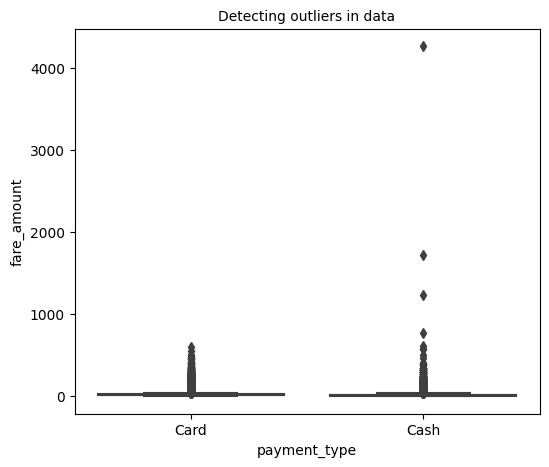

In [23]:
# From descriptive statistic, it shows there are outliers, lets see it in charts. This can be done by scatterplot, boxplot, histograms, z-score plt or qq-plot.
plt.figure (figsize = (6,5))
plt.title ('Detecting outliers in data', fontsize = 10)
sns.boxplot(data = data, x = 'payment_type', y = 'fare_amount')
plt.show()

In [24]:
# The boxplot shows the outliers. So, to remove it, I can either use z-score (better suited for noraml distribution, here not preferred). Hence, I use IQR.
for col in ['fare_amount', 'trip_distance', 'duration']:
    q1 = data [col].quantile (0.25)   # Q1
    q3 = data [col].quantile (0.75)   # Q3
    IQR = q3 - q1

    lower_bound = q1-1.5*IQR
    upper_bound = q3+1.5*IQR

    # Now the date should be greater than lower_bound and less than upper_bound
    data = data [ (data[col] >= lower_bound) & (data[col] <= upper_bound) ]

data.shape

(2297908, 5)

##### Now, to analyze customer preference of payment type in terms of duration and fare. For this, I selected histograms as they easily show normal distribution.
##### This helps to analyze whether there is any relationship between card payments and fare amount or duration of travel.


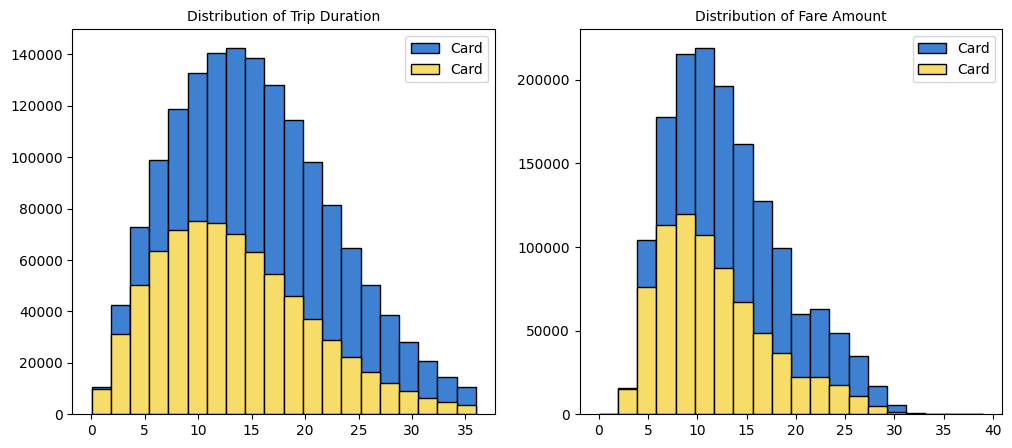

In [25]:
plt.figure (figsize = (12,5) )
plt.subplot (1,2,1)
plt.title ('Distribution of Trip Duration', fontsize = 10)
plt.hist (data[data['payment_type'] == 'Card']['duration'], histtype = 'barstacked', bins = 20, edgecolor = 'k', color = '#3E81D3', label = data['payment_type'])
plt.hist (data[data['payment_type'] == 'Cash']['duration'], histtype = 'barstacked', bins = 20, edgecolor = 'k', color = '#F8DC68', label = data['payment_type'])
plt.legend()

plt.subplot (1,2,2)
plt.title ('Distribution of Fare Amount', fontsize = 10)
plt.hist (data[data['payment_type'] == 'Card']['fare_amount'], histtype = 'barstacked', bins = 20, edgecolor = 'k', color = '#3E81D3', label = data['payment_type'])
plt.hist (data[data['payment_type'] == 'Cash']['fare_amount'], histtype = 'barstacked', bins = 20, edgecolor = 'k', color = '#F8DC68', label = data['payment_type'])
plt.legend()
plt.show()

##### Lets now see the mean and standard deviation using statistical method grouping all data.


In [26]:
data.groupby('payment_type').agg ({ 'fare_amount' : ['mean', 'std'], 'trip_distance': ['mean', 'std'] })

fare_amount           trip_distance         
                    mean       std          mean      std
payment_type                                             
Card           13.112493  5.849281      2.992237  1.99274
Cash           11.758005  5.613038      2.602207  1.91372

##### From this statistical measure, and the distribution it is clear the more the fare amount, customers use card payment both in terms of trip distance and total fare.
##### Lets now see the card payment percentages. For this either donut or pie is preferred.

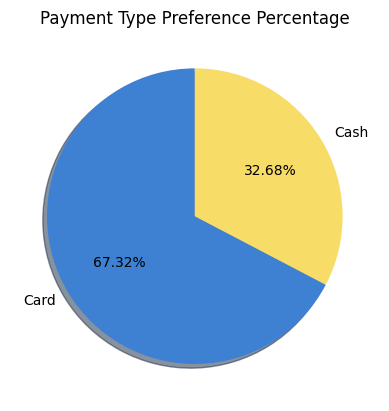

In [27]:
# Pie Chart for payment type percentage 
plt.figure ()
plt.title ('Payment Type Preference Percentage')
plt.pie (data ['payment_type'].value_counts(normalize = True), labels = data['payment_type'].value_counts().index, startangle = 90, shadow = True, 
           colors = ['#3E81D3','#F8DC68'], autopct = '%1.2f%%'   )
plt.show()

##### Hence, we now are certain customers prefer to pay by card more.
##### Now, lets look at passenger count to see if more passengers generate more revenue.

#### Passenger Count Analysis

In [28]:
passenger_count = data.groupby (['payment_type', 'passenger_count']) [['passenger_count']].count()
passenger_count

passenger_count
payment_type passenger_count                 
Card         1                         909245
             2                         327661
             3                         122412
             4                          63676
             5                         124045
Cash         1                         460550
             2                         155472
             3                          54506
             4                          32715
             5                          47626

##### This distribution helps us to get the percentage of each grouped passenger count in terms of payment type. This will be further plotted as a stacked bar so that it identifies the details of each passenger group and payment type respectively.

In [29]:
passenger_count.rename (columns = {'passenger_count' : 'count'}, inplace = True)
passenger_count.reset_index (inplace = True)


In [30]:
passenger_count ['perc'] = (passenger_count['count']/passenger_count['count'].sum())* 100
passenger_count

,payment_type,passenger_count,count,perc
0,Card,1,909245,39.568381
1,Card,2,327661,14.259100
2,Card,3,122412,5.327106
3,Card,4,63676,2.771042
4,Card,5,124045,5.398171
5,Cash,1,460550,20.042143
6,Cash,2,155472,6.765806
7,Cash,3,54506,2.371984
8,Cash,4,32715,1.423686
9,Cash,5,47626,2.072581


##### To use a stacked bar, the data is passed to a new dataframe.

In [31]:
data_new = pd.DataFrame (columns = ['payment_type',1,2,3,4,5])
data_new['payment_type'] = ['Card', 'Cash']
data_new.iloc[0,1:] = passenger_count.iloc[0:5,-1]
data_new.iloc[1,1:] = passenger_count.iloc[5:, -1]    #iloc [row_number,col_number]
data_new

,payment_type,1,2,3,4,5
0,Card,39.568381,14.2591,5.327106,2.771042,5.398171
1,Cash,20.042143,6.765806,2.371984,1.423686,2.072581


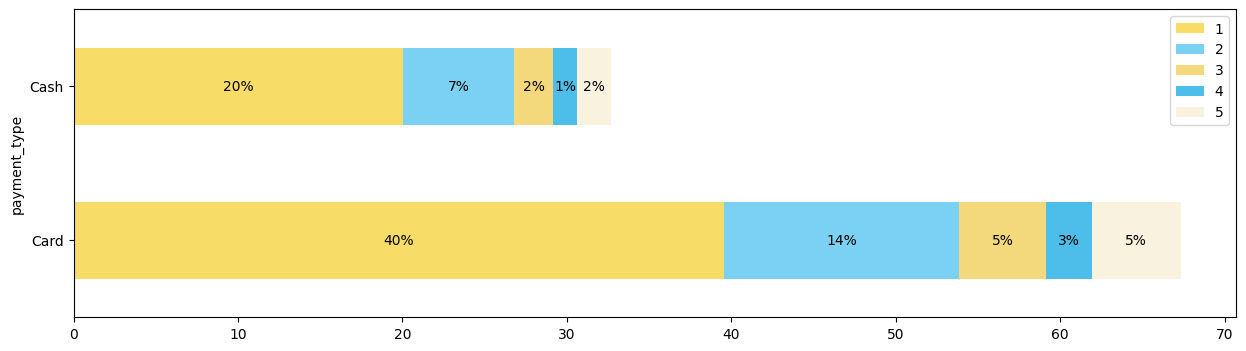

In [32]:
#Creating stacked bar
fig, ax = plt.subplots(figsize = (15,4))
data_new.plot (x = 'payment_type', kind = 'barh', color = ['#F8DC68', '#7BD1F3', '#F3D97B', '#4DBDE9', '#F8F2DE' ], stacked = True, ax = ax)

#Adding percentage text to bar
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x,y = p.get_xy()
    ax.text(x + width /2,
           y + height /2,
           '{:.0f}%'.format(width),
            horizontalalignment = 'center',
            verticalalignment = 'center')

#### Hypothesis Testing for the Analysis

##### Null Hypothesis (Generally H0 a statement saying there is no effect):
###### There is no difference between customers using card payment or cash payment.
##### Alternative Hypothesis(Generally H1 is a difference between the means of the two groups):
###### There is a difference between customers paying by cash or card.

##### Lets identify the testing that suits in this case.
###### 1. Card and Cash are two independent samples to compare the mean average. Fare Amount is a continuous value.
###### 2. Chi-Square Test is a test concerning if the data is predicted, not suitable.
###### 3. Anova is performed when the data group is high, sice we have 2, not suitable.
###### 4. Z-Test sees if the average mean is same (large dataset, std should be known and should be normally distributed. Since we do not know std, lets check if normally distributed using qq-plot)


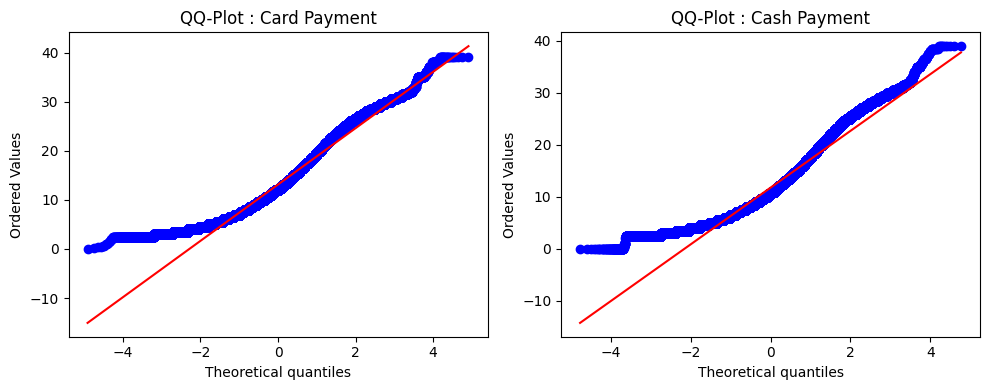

In [33]:
# Extracting fare amount data for Card and Cash payment types
fare_card = data[data['payment_type'] == 'Card']['fare_amount']
fare_cash = data[data['payment_type'] == 'Cash']['fare_amount']

# Creating subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plotting QQ plot for fare amount of Card payment type
stats.probplot(fare_card, dist="norm", plot = axs[0])
axs[0].set_title('QQ-Plot : Card Payment')

# Plotting QQ plot for fare amount of Cash payment type
stats.probplot(fare_cash, dist="norm", plot = axs[1])
axs[1].set_title('QQ-Plot : Cash Payment')

plt.tight_layout()
plt.show()

##### From the diagrams of Fare Amount for both cash and card payment, we clearly see the amount is not normally distributed, especially in the tails. This means high amount (outliers). To be linear, they must align with the red line and not deviate. This was also known from previous histogram, as it was right skewed and not normally distributed.
##### Hence, Z-Test is not possible. We go for T-Test.(T-Test is suitable for not huge date, however is perfect when data is not normally distributed and std unknown.)

#### T-Test:

In [34]:
# Cash and Card Samples:
Cash_sample = data[data['payment_type'] == 'Cash']['fare_amount']
Card_sample = data[data['payment_type'] == 'Card']['fare_amount']

In [37]:
# T-Stats
t_stats, p_value = stats.ttest_ind( a = Card_sample, b = Cash_sample, equal_var = False )
print ('T-Statistics :', t_stats, ' & ', 'p-value :', p_value)

# Hyputhesis Rejection.
if (p_value) > 0.05:
    print ('\n Accept Null Hypothesis!!!')
else:
    print ('\n Reject Null Hypothesis!!!')

T-Statistics : 169.2111527245052  &  p-value : 0.0

 Reject Null Hypothesis!!!


##### Hence, T-Stat value and p-value (0.0) suggests we reject the Null_Hypothesis. In Fact, this states there is significant difference in the fare amount between the two payment methods.


### Project Insights and Recommendations:
##### APPLIED METHOD - Descriptive Statistics, Hypothesis Testing (T-Test)
##### INSIGHTS - Customers with card transactions have higgher fare amount and trip duration. Indicates customers prefer card for longer distance and higher fare amount.
#####   Total card transaction is 67.5% while cash transaction is 32.5%. Potentially due to security, convenience or incentives for card transactions.
#####   Among Card Payments - single passengers contribute 40% transaction which decreases as no. of passngers increase.
##### Among Cash Payments - Single passengers contrbute 20% total transaction which also decrease as no. of passengeers increase.
##### Hence, the insights indicate the need to consider both payment methods and passenger count indicated from customer behaviour and preferences. The Alternative Hypothesis indicates the difference between the two payment methods.


#### Recommendations:
##### Encourage customers to pay by card to generate more revenue. 
##### Offer incentives to choose this method of payment.
##### Provide convenient and secure credit card payment options encouraging customers to adopt this method of payment.

##### Data Source: https://data.world/vizwiz/nyc-taxi-jan-2020/workspace/file?filename=yellow_tripdata_2020-01.csv
##### My Portfolio: https://sanjayjyakhwa.azurewebsites.net/